In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import math
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
matrix = np.array([ ['A','B','C','-1'],['D','-1','E','F'],[ 'G' , 'H' , 'M' , 'I' ],['-1','J','K','L'] ])
Dimensions = np.array([[(0,0),(0,1),(0,3),(-1,-1)],[(1,2),(-1,-1),(1,4),(1,5)],[ (2,4) , (2,5) , (2,7) , (2,8) ],[(-1,-1),(3,3),(3,6),(3,8)]])
# Nodes = [ 'A' , 'B', 'C',  'D' , 'E' , 'F' , 'G' , 'H' , 'I' , 'J' , 'K' , 'L' , 'M'] 

In [3]:
G = nx.Graph()
G.add_edge("A","B", weight=1)
G.add_edge("A","D", weight=2)
G.add_edge("B","C", weight=2)
G.add_edge("C","E", weight=1)
G.add_edge("E","F", weight=1)
G.add_edge("E","M", weight=3)
G.add_edge("D","G", weight=2)
G.add_edge("G","H", weight=1)
G.add_edge("H","M", weight=2)
G.add_edge("H","J", weight=2)
G.add_edge("J","K", weight=3)
G.add_edge("F","I", weight=3)
G.add_edge("I","M", weight=1)
G.add_edge("I","L", weight=1)
G.add_edge("K","L", weight=2)
G.add_edge("K","M", weight=1)

In [4]:
def hue(A,B):
    
    initial = A
    goal = B

    goal_ = np.argwhere(matrix == goal)
    path = [] 
    #[0][1] col
    #[0][0] row

    row_goal = goal_[0][0]
    col_goal = goal_[0][1]

    current = initial
    prev = '-2'
    steps = 0
    path.append(current) 
    while current != goal:
        steps = steps + 1
      
        current_ = np.argwhere(matrix == current)
        row_cur = current_[0][0]
        col_cur = current_[0][1]
        if row_cur < row_goal :
            if row_cur+1>3 or matrix[row_cur+1][col_cur]  == '-1' or prev == matrix[row_cur+1][col_cur]: #down
                if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1] : #right
                    if col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1]  : #left
                        if  row_cur-1 <0  or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur]: #up 
                            break
                        else:
                            prev = current
                            current =  matrix[row_cur-1][col_cur]
                            path.append(current) 
                    else:
                        prev = current
                        current =  matrix[row_cur][col_cur-1]
                        path.append(current)          
                else:
                    prev = current  
                    current =  matrix[row_cur][col_cur+1]
                    path.append(current)   
            else:
                prev = current
                current =  matrix[row_cur+1][col_cur]
                path.append(current)
        elif row_cur > row_goal :
            if   row_cur-1 <0  or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur] : #up
                if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1]: #right
                    if  col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1]: #left
                        if  row_cur+1>3 or matrix[row_cur+1][col_cur] == '-1' or prev == matrix[row_cur+1][col_cur]: #down
                            break
                        else:    
                            prev = current
                            current =  matrix[row_cur+1][col_cur]
                            path.append(current) 
                    else:
                        prev = current
                        current =  matrix[row_cur][col_cur-1]
                        path.append(current)          
                else:
                    prev = current 
                    current =  matrix[row_cur][col_cur+1]
                    path.append(current)   
            else:
                current =  matrix[row_cur-1][col_cur]
                path.append(current)
        elif row_cur == row_goal :
            if col_cur < col_goal :
                if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1] : #right
                    if row_cur-1 <0  or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur]: #up
                        if row_cur+1>3 or matrix[row_cur+1][col_cur] == '-1' or prev == matrix[row_cur+1][col_cur]: #down
                            if col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1]: #left
                                break
                            else:
                                prev = current
                                current =  matrix[row_cur][col_cur-1]
                                path.append(current)
                        else:
                            prev = current
                            current =  matrix[row_cur+1][col_cur]
                            path.append(current)
                    else:
                        prev = current
                        current =  matrix[row_cur-1][col_cur]
                        path.append(current)
                else:
                    prev = current
                    current =  matrix[row_cur][col_cur+1]
                    path.append(current)
            else:
                if col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1]: #left                    
                    if  row_cur-1 <0  or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur]: #up                       
                        if row_cur+1>3 or matrix[row_cur+1][col_cur] == '-1' or prev == matrix[row_cur+1][col_cur]: #down                            
                            if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1] : #right
                                break
                            else:
                                prev = current
                                current = matrix[row_cur][col_cur+1]
                                path.append(current)
                        else:
                            prev = current
                            current = matrix[row_cur+1][col_cur]
                            path.append(current)
                    else:
                        prev = current
                        current = matrix[row_cur-1][col_cur]
                        path.append(current)
                else:
                    prev = current
                    current = matrix[row_cur][col_cur-1]
                    path.append(current)
    return path,steps

In [5]:
def hue_s(A,B):
    
    initial = A
    goal = B

    goal_ = np.argwhere(matrix == goal)
    path=[] 
    #[0][1] col
    #[0][0] row

    row_goal = goal_[0][0]
    col_goal = goal_[0][1]

    current = initial
    prev = '-2'
    steps = 0
    path.append(current) 
    while current != goal:
        steps = steps + 1
      
        current_ = np.argwhere(matrix == current)
        row_cur = current_[0][0]
        col_cur = current_[0][1]
        if col_cur < col_goal :
            if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1]  : #right
                if row_cur-1 <0 or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur] : #up
                    if row_cur+1>3 or matrix[row_cur+1][col_cur] == '-1' or prev == matrix[row_cur+1][col_cur] : #down
                        if col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1] : #left
                            break
                        else:
                            prev = current
                            current =  matrix[row_cur][col_cur-1]
                            path.append(current)
                    else:
                        prev = current
                        current =  matrix[row_cur+1][col_cur]
                        path.append(current)
                else:
                    prev = current
                    current =  matrix[row_cur-1][col_cur]
                    path.append(current)
            else:
                prev = current
                current =  matrix[row_cur][col_cur+1]
                path.append(current)
        elif col_cur > col_goal:  
            if col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1]  : #left
                if  row_cur-1 <0 or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur] : #up
                    if row_cur+1>3 or matrix[row_cur+1][col_cur] == '-1' or prev == matrix[row_cur+1][col_cur] : #down             
                        if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1]  : #right
                            break
                        else:
                            prev = current
                            current =  matrix[row_cur][col_cur+1]
                            path.append(current)
                    else:
                        prev = current
                        current =  matrix[row_cur+1][col_cur]
                        path.append(current)
                else:
                    prev = current
                    current =  matrix[row_cur-1][col_cur]
                    path.append(current)
            else:
                prev = current
                current = matrix[row_cur][col_cur-1]
                path.append(current)



        elif col_cur == col_goal :
            if row_cur > row_goal :
                
                if row_cur-1 <0 or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur] or row_cur-1<0: #up
                    if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1] or col_cur+1 > 3: #right
                        if col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1]  or col_cur-1<0: #left
                            if row_cur+1>3 or matrix[row_cur+1][col_cur] == '-1' or prev == matrix[row_cur+1][col_cur] or row_cur+1>3: #down
                                break
                            else:
                                prev = current
                                current =  matrix[row_cur+1][col_cur]
                                path.append(current) 
                        else:
                            prev = current
                            current =  matrix[row_cur][col_cur-1]
                            path.append(current)          
                    else: 
                        prev = current 
                        current =  matrix[row_cur][col_cur+1]
                        path.append(current)   
                else:
                    current =  matrix[row_cur-1][col_cur]
                    path.append(current)

            elif row_cur < row_goal :
                
                if row_cur+1>3 or matrix[row_cur+1][col_cur]  == '-1' or prev == matrix[row_cur+1][col_cur] : #down
                    
                    if col_cur+1>3 or matrix[row_cur][col_cur+1] == '-1' or prev == matrix[row_cur][col_cur+1] : #right
                        if  col_cur-1<0 or matrix[row_cur][col_cur-1] == '-1' or prev == matrix[row_cur][col_cur-1] : #left
                            if  row_cur-1 <0 or matrix[row_cur-1][col_cur] == '-1' or prev == matrix[row_cur-1][col_cur] : #up 
                                break
                            else:
                                prev = current
                                current =  matrix[row_cur-1][col_cur]
                                path.append(current) 
                        else:
                            prev = current
                            current =  matrix[row_cur][col_cur-1]
                            path.append(current)          
                    else:
                        prev = current  
                        current =  matrix[row_cur][col_cur+1]
                        path.append(current)   
                else:
                    prev = current
                    current =  matrix[row_cur+1][col_cur]
                    path.append(current)

    return path,steps

In [6]:
def Final_Hue(State,Goal):
    p,s = hue(State,Goal)
    p1,s1= hue_s(State,Goal)
    if(s>s1):
        p=p1
    s=min(s,s1)

    return s

In [7]:
def Cost(x1,y1,x2,y2):
    return int(math.sqrt(((x1-x2)**2)+((y1-y2)**2))) 

In [8]:
def A_(Initial, Goal):
    total_cost=0
    visited = []
    current= Initial
  

    while current != Goal:
        
        current_h = Final_Hue(current, Goal) 
        current_p = np.argwhere(matrix == current)
        row_cur  = current_p[0][0]
        col_cur  = current_p[0][1]
        Hue_List = [999,999,999,999]
        visited.append(current)
        f_n=[999,999,999,999] 
        costs = [999,999,999,999] 

        if (row_cur+1 < 4 and matrix[row_cur+1][col_cur]  != '-1' and  matrix[row_cur+1][col_cur] not in visited): #down          
            newstate = matrix[row_cur+1][col_cur]
            newstate_p = np.argwhere(matrix == newstate)
            row_newstate  = newstate_p[0][0]
            col_newstate  = newstate_p[0][1]
            c = total_cost+Cost(Dimensions[row_cur][col_cur][0],Dimensions[row_cur][col_cur][1],Dimensions[row_newstate][col_newstate][0],Dimensions[row_newstate][col_newstate][1]) 
            newstate_h = Final_Hue(newstate,Goal)
            f_n[0]= c + newstate_h
            Hue_List[0] = newstate_h
            costs[0] = c-total_cost

        if col_cur + 1 < 4 and matrix[row_cur][col_cur+1] != '-1' and matrix[row_cur][col_cur+1] not in visited:  #right
            
            newstate = matrix[row_cur][col_cur+1]
            newstate_p = np.argwhere(matrix == newstate)
            row_newstate  = newstate_p[0][0]
            col_newstate  = newstate_p[0][1]
            c = total_cost+Cost(Dimensions[row_cur][col_cur][0],Dimensions[row_cur][col_cur][1],Dimensions[row_newstate][col_newstate][0],Dimensions[row_newstate][col_newstate][1]) 
            newstate_h = Final_Hue(newstate,Goal)
            f_n[1]= c + newstate_h
            Hue_List[1] = newstate_h
            costs[1] = c-total_cost

        if  col_cur-1 > -1  and matrix[row_cur][col_cur-1] != '-1' and matrix[row_cur][col_cur-1] not in visited: #left
            newstate = matrix[row_cur][col_cur-1]
            newstate_p = np.argwhere(matrix == newstate)
            row_newstate  = newstate_p[0][0]
            col_newstate  = newstate_p[0][1]
            c = total_cost+Cost(Dimensions[row_cur][col_cur][0],Dimensions[row_cur][col_cur][1],Dimensions[row_newstate][col_newstate][0],Dimensions[row_newstate][col_newstate][1]) 
            newstate_h = Final_Hue(newstate,Goal)
            f_n[2]= c + newstate_h
            Hue_List[2] = newstate_h
            costs[2] = c-total_cost

        if  row_cur-1>-1 and matrix[row_cur-1][col_cur] != '-1' and matrix[row_cur-1][col_cur] not in visited: #up
            newstate = matrix[row_cur-1][col_cur]
            newstate_p = np.argwhere(matrix == newstate)
            row_newstate  = newstate_p[0][0]
            col_newstate  = newstate_p[0][1]
            c = total_cost+Cost(Dimensions[row_cur][col_cur][0],Dimensions[row_cur][col_cur][1],Dimensions[row_newstate][col_newstate][0],Dimensions[row_newstate][col_newstate][1]) 
            newstate_h = Final_Hue(newstate,Goal)
            f_n[3]= c + newstate_h
            Hue_List[3] = newstate_h
            costs[3] = c-total_cost

        m = min(f_n)
        indx = f_n.index(m)
        hue_of_min = m-costs[indx]
        
        for i in range(4):
            if ( m == f_n[i] ):
                if ( Hue_List[i] < hue_of_min):
                    hue_of_min = Hue_List[i]
                    indx=i   
  

        if(indx==0):
            current = matrix[row_cur+1][col_cur]
            total_cost= total_cost+ costs[0]
        elif(indx==1):
            current = matrix[row_cur][col_cur+1]
            total_cost= total_cost+ costs[1]
        elif(indx==2):
            current = matrix[row_cur][col_cur-1]
            total_cost= total_cost+ costs[2]
        else:
            current = matrix[row_cur-1][col_cur]   
            total_cost= total_cost+ costs[3]
    visited.append(current)      
    return   visited,total_cost

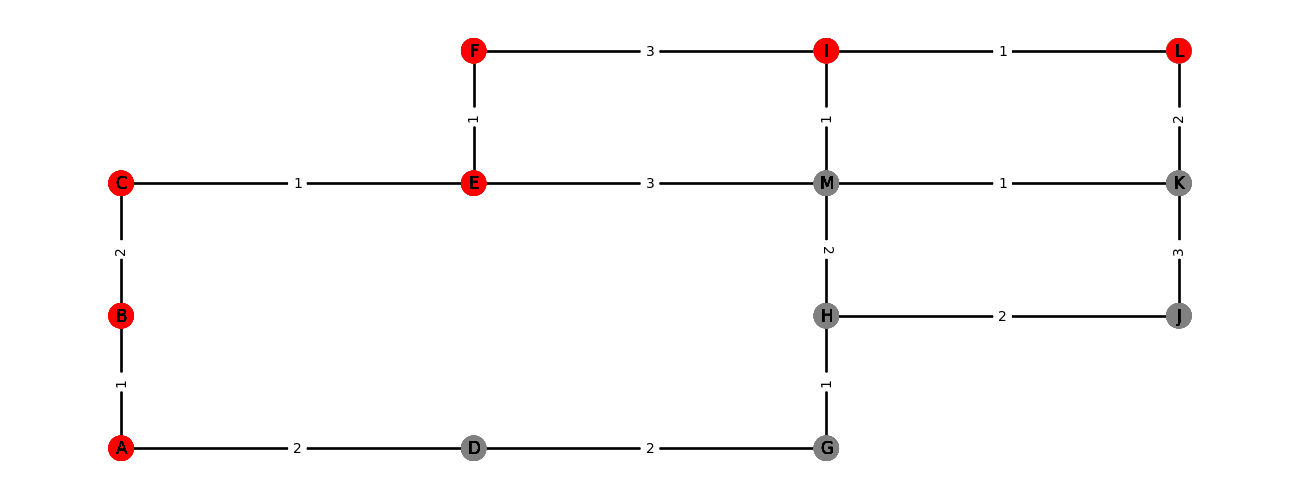

In [9]:
# Define the function to get the path
def get_path(start, end):
    path , c = A_(start , end)
    return path ,c

# Create the GUI
root = tk.Tk()

# Create the first label widget to display a prompt to the user
label1 = tk.Label(root, text="Enter start node:")
label1.pack()

# Create the first entry widget to allow the user to enter a value
entry1 = tk.Entry(root)
entry1.pack()

# Create the second label widget to display a prompt to the user
label2 = tk.Label(root, text="Enter end node:")
label2.pack()

# Create the second entry widget to allow the user to enter a value
entry2 = tk.Entry(root)
entry2.pack()

# Create a label widget to display the path
path_label = tk.Label(root, text="")
path_label.pack()

# Create a label widget to display the cost
cost_label = tk.Label(root, text="")
cost_label.pack()

# Create a button to submit the values
button1 = tk.Button(root, text="Run", command=lambda: get_path_and_draw(entry1.get(), entry2.get()))
button1.pack()

# Define the path to follow
path = []
path_index = 0

# Create a label to show the current node
label3 = tk.Label(root, text="", font=("Arial", 24))
label3.pack()

color_map = {}

# Initialize the graph and positions
pos = {'A': (0, 2), 'B': (0, 4),'C': (0,6),'D': (1, 2),'E': (1, 6),'F': (1, 8),'G': (2, 2),
       'H': (2, 4),'M': (2, 6),'I': (2, 8),'J': (3, 4),'K': (3, 6),'L': (3, 8)}
# pos = nx.spring_layout(G)

# Create a function to draw the graph
def draw_graph():
    global pos, canvas
    node_colors = [color_map[node] if node in color_map else 'gray' for node in G.nodes()]
    nx.draw(G, pos, node_color=node_colors)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels )
    nx.draw_networkx_labels(G, pos)
    canvas.draw()

# Create a function to get the path and draw it
def get_path_and_draw(start, end):
    global path, path_index, color_map
    path,cost = get_path(start, end)
    path_index = 0
    color_map = {path[0]: 'red'}
    path_label.config(text="Path: " + str(path))
    cost_label.config(text="cost: " + str(cost))
    label3.config(text=path[0])
    draw_graph()
    
# Create a function to move to the next node in the path with animation
def animate_path():
    global path_index
    if path_index < len(path)-1:
        path_index += 1
        node = path[path_index]
        label3.config(text=node)
        color_map[node] = 'red'
        draw_graph()

        # Call animate_path() again after a certain delay
        root.after(700, animate_path)

# Create a button to move to the next node in the path with animation
button3 = tk.Button(root, text="Get Path", command=animate_path)
button3.pack()


# Create a figure and canvas to display the graph
fig = plt.figure(figsize=(8, 6))
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# Draw the initial graph
draw_graph()

# Start the GUI
root.mainloop()
